## Adding SNe to CoCo
___

This notebook will go through adding a SN to the CoCo template framework.

In [1]:
%matplotlib inline
# %matplotlib notebook

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table, Column
from collections import OrderedDict

import pycoco as pcc

## Download SN
---
The example that I will go through is probably the simplest one - from a JSON that I have downloaded from http://sne.space contaning the information for SN2015U.

In [2]:
import json

In [3]:
snname = "SN2011dh"
path = "/Users/berto/data/CoreCollapse/SNe/SN2011dh.json"

sndict = json.load(open(path, 'r'))[snname]

In [4]:
sndict.keys()

dict_keys(['schema', 'name', 'sources', 'alias', 'claimedtype', 'comovingdist', 'dec', 'discoverdate', 'discoverer', 'ebv', 'host', 'hostdec', 'hostoffsetang', 'hostoffsetdist', 'hostra', 'hostvelocity', 'lumdist', 'maxabsmag', 'maxappmag', 'maxband', 'maxdate', 'maxvisualabsmag', 'maxvisualappmag', 'maxvisualband', 'maxvisualdate', 'ra', 'redshift', 'velocity', 'photometry', 'spectra'])

In [5]:
sndict["redshift"][0]["value"]

'0.001638'

In [6]:
len(sndict["spectra"])

79

In [7]:
S1 = sndict["spectra"][0]

In [8]:
S1.keys()

dict_keys(['time', 'filename', 'instrument', 'observer', 'redshift', 'reducer', 'reduction', 'u_fluxes', 'u_time', 'u_wavelengths', 'data', 'source'])

In [9]:
w = np.array(S1["data"], dtype=np.float64).T[0]
f = np.array(S1["data"], dtype=np.float64).T[1]

In [10]:
f

array([  2.79605900e-15,   3.17079400e-15,   3.68641300e-15, ...,
         1.73847600e-15,   1.66324700e-15,   1.60761500e-15])

In [11]:
from astropy.table import Table, Column, Row
import astropy.units as u


In [12]:
wavelength = Column(w, name = ("wavelength"), unit=u.Angstrom)
flux = Column(f, name = ("flux"), unit=u.cgs.erg / u.si.s / u.si.cm ** 2 / u.angstrom)

In [13]:
Table([wavelength, flux])

wavelength,flux
Angstrom,erg / (Angstrom cm2 s)
float64,float64
3301.657959,2.796059e-15
3304.316813,3.170794e-15
3306.975666,3.686413e-15
3309.63452,4.057969e-15
3312.293373,3.761342e-15
3314.952227,3.297081e-15
3317.61108,3.096921e-15
3320.269934,3.347441e-15


In [14]:
spec_dict_list = sndict["spectra"]
for i, s in enumerate(spec_dict_list):
    print(i, s["time"], s["filename"])

0 55715.0 SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat
1 55715.0 SN2011dh-2011-06-03-TNG-NICS-IJ-HK.dat
2 55715.3 ptf11eon-20110603.335-br.flm
3 55716.0 11eon_20110604_TNG_v2.ascii
4 55716.0 SN2011dh-2011-06-04-ASIAGO-AFOSC-GR04.dat
5 55717.0 SN2011dh-2011-06-05-CA-CAFOS-B-200-R-200.dat
6 55717.0 SN2011dh-2011-06-05-NOT-ALFOSC-Grism_4-Grism_5.dat
7 55718.0 SN2011dh-2011-06-06-ASIAGO-AFOSC-VPH4.dat
8 55718.0 SN2011dh-2011-06-06-NOT-ALFOSC-Grism_4-Grism_5.dat
9 55719.0 PTF11eon-first-20110607.dat
10 55720.0 SN2011dh-2011-06-08-NOT-ALFOSC-Grism_4-Grism_5.dat
11 55720.0 SN2011dh-2011-06-08-WHT-ISIS-R300B-R158R.dat
12 55721.0 11eon_20110609_Lick3-m_v1.ascii
13 55721.0 SN2011dh-2011-06-09-TNG-NICS-IJ-HK.dat
14 55721.4 ptf11eon-20110609.383-ui.flm
15 55722.0 SN2011dh-2011-06-10-WHT-ISIS-R300B-R158R.dat
16 55723.0 SN2011dh-2011-06-11-TNG-LRS-VHRV.dat
17 55724.0 11eon_20110612_LT_blue.ascii
18 55724.0 11eon_20110612_WHT_v1.ascii
19 55724.0 SN2011dh-2011-06-12-WHT-ISIS-R300B-R158R.dat
20 55729.0 SN20

In [15]:
print(len(spec_dict_list))

79


In [16]:
spec_dict_list[23]["time"]

'55736.123360'

In [17]:
# to_combine = ["SN10as_100325_VLT_XS_", 
#               "SN10as_100326_VLT_XS_", 
#               "SN10as_100328_VLT_XS_", 
#               "SN10as_100329_VLT_XS_"]

# to_combine_phases = [55280.0,
#                      55281.0,
#                      55283.0,
#                      55284.0]

# spec_filenames = [spec["filename"] for spec in sndict["spectra"]]
# # spec_filenames = [spec["filename"][:-7] for spec in sndict["spectra"]]
# mask = np.ones(len(spec_dict_list), dtype=bool)

# combined = np.array([])

# for prefix in to_combine:
#     matches = [f for f in spec_filenames if prefix in f]
#     print(matches)
    
#     spec_dir = "/Users/berto/data/CoreCollapse/data/spectra/SN2010as/"
    
#     tables = []
#     out_dict = OrderedDict()
#     for file in matches:
#         w = np.where(np.array(spec_filenames) == file)[0]
        
#         wavl = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[0]
#         flux = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[1]
        
#         wavelength = Column(wavl, name = ("wavelength"), unit=u.Angstrom)
#         flux = Column(flux, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)
     
#         tables.append(Table([wavelength, flux]))
        
#         for i in w:
#             print(i, spec_dict_list[i]["filename"])
#             mask[i] = False
# #             spec_dict_list.pop(i)
            
#     tables = np.array(tables)[np.argsort([i["wavelength"][0] for i in tables])]
    
#     S1 = pcc.SpectrumClass()
#     S2 = pcc.SpectrumClass()
#     S3 = pcc.SpectrumClass()
    
#     S1.load_table(tables[0], path="")
#     S2.load_table(tables[1], path="")
#     S3.load_table(tables[2], path="")
    
#     sr=pcc.functions.combine_spectra(S2, S3, 9975, 10150, scale=True)
#     spec = pcc.functions.combine_spectra(S1,sr, 5502.5, 5525)
    
#     out_spec = pcc.SpectrumClass()
#     out_spec.load_table(spec.data, path="", trim_wavelength=True, wmin=0, wmax=15000)
    
#     filename = prefix+"combined.dat"
    
#     out_dict["filename"] = os.path.join(spec_dir, filename)
#     out_dict["time"] = np.float64(spec_dict_list[w]["time"])
#     out_dict["redshift"] = spec_dict_list[w]["redshift"]
#     out_dict["snname"] = snname
    
#     combined = np.append(combined, out_dict)
    
# #     spec.plot()
# #     spec.save(filename, path=spec_dir, format="ascii.commented_header", verbose=True)
#     out_spec.plot()
#     out_spec.save(filename, path=spec_dir, format="ascii.commented_header", verbose=True)

In [18]:
out_dict = OrderedDict()

In [19]:
uncombined=np.array([])
spec_filenames = [spec["filename"] for spec in sndict["spectra"]]
# print(spec_filenames)
spec_dir = "/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/"

SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat
0
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat
has data
redshift  0.001638
55715.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-03-TNG-LRS-LRB-LRR.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


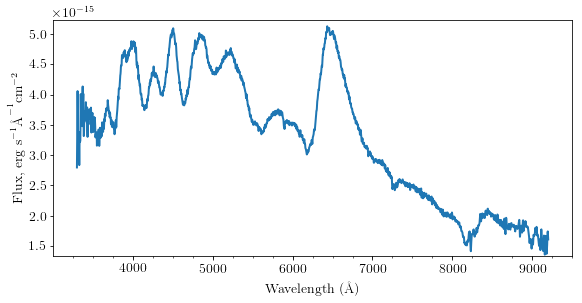

SN2011dh-2011-06-03-TNG-NICS-IJ-HK.dat
1
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-03-TNG-NICS-IJ-HK.dat
has data
redshift  0.001638
55715.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-03-TNG-NICS-IJ-HK.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


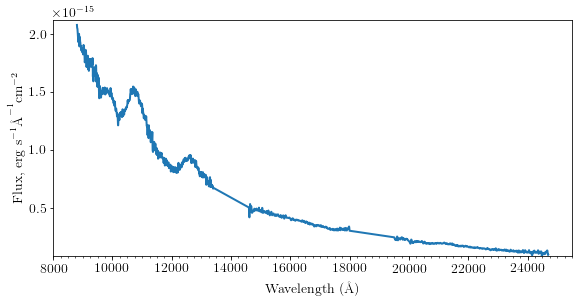

ptf11eon-20110603.335-br.flm
2
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20110603.335-br.flm
has data
redshift  0.001638
55715.3


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20110603.335-br.flm. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


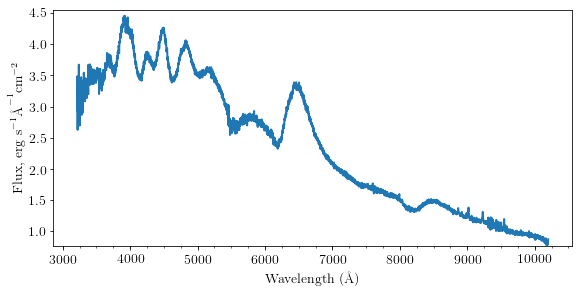

11eon_20110604_TNG_v2.ascii
3
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110604_TNG_v2.ascii
has data
redshift  0.001638
55716.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110604_TNG_v2.ascii. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


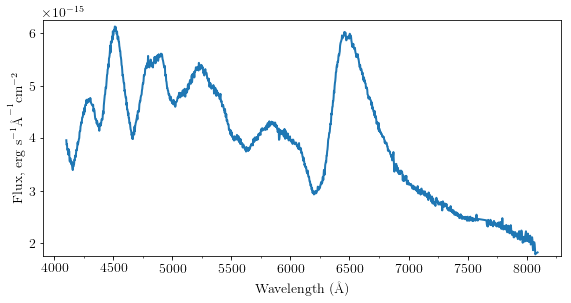

SN2011dh-2011-06-04-ASIAGO-AFOSC-GR04.dat
4
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-04-ASIAGO-AFOSC-GR04.dat
has data
redshift  0.001638
55716.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-04-ASIAGO-AFOSC-GR04.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


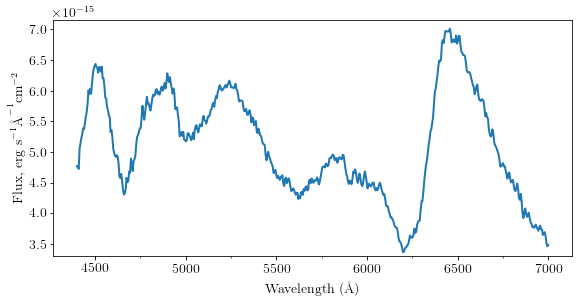

SN2011dh-2011-06-05-CA-CAFOS-B-200-R-200.dat
5
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-05-CA-CAFOS-B-200-R-200.dat
has data
redshift  0.001638
55717.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-05-CA-CAFOS-B-200-R-200.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


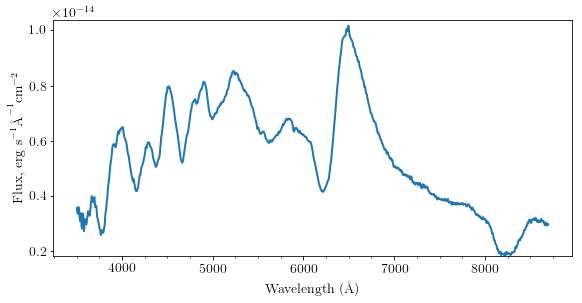

SN2011dh-2011-06-05-NOT-ALFOSC-Grism_4-Grism_5.dat
6
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-05-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55717.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-05-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


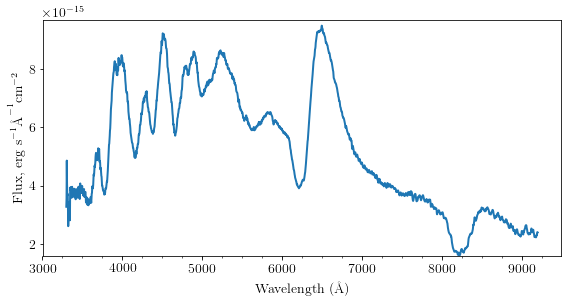

SN2011dh-2011-06-06-ASIAGO-AFOSC-VPH4.dat
7
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-06-ASIAGO-AFOSC-VPH4.dat
has data
redshift  0.001638
55718.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-06-ASIAGO-AFOSC-VPH4.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


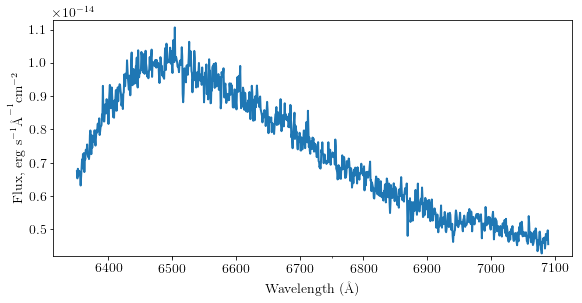

SN2011dh-2011-06-06-NOT-ALFOSC-Grism_4-Grism_5.dat
8
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-06-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55718.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-06-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


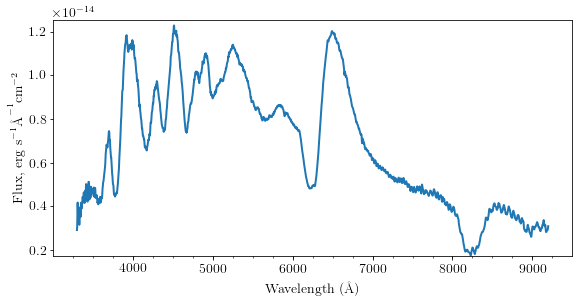

PTF11eon-first-20110607.dat
9
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/PTF11eon-first-20110607.dat
has data
redshift  0.001638
55719.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/PTF11eon-first-20110607.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


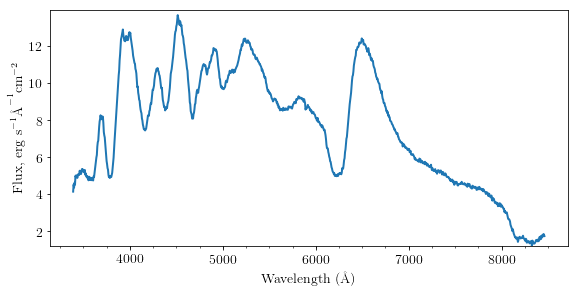

SN2011dh-2011-06-08-NOT-ALFOSC-Grism_4-Grism_5.dat
10
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-08-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55720.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-08-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


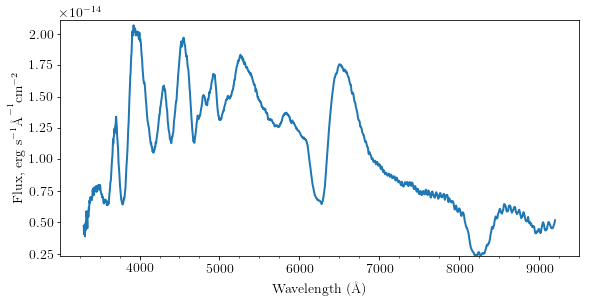

SN2011dh-2011-06-08-WHT-ISIS-R300B-R158R.dat
11
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-08-WHT-ISIS-R300B-R158R.dat
has data
redshift  0.001638
55720.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-08-WHT-ISIS-R300B-R158R.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


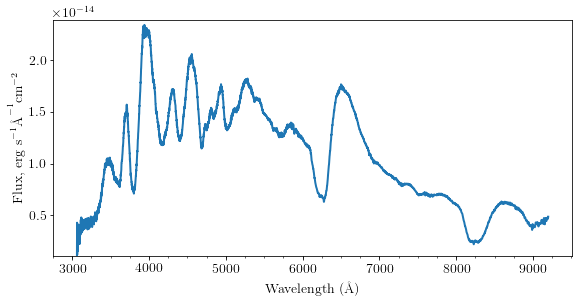

11eon_20110609_Lick3-m_v1.ascii
12
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110609_Lick3-m_v1.ascii
has data
redshift  0.001638
55721.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110609_Lick3-m_v1.ascii. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


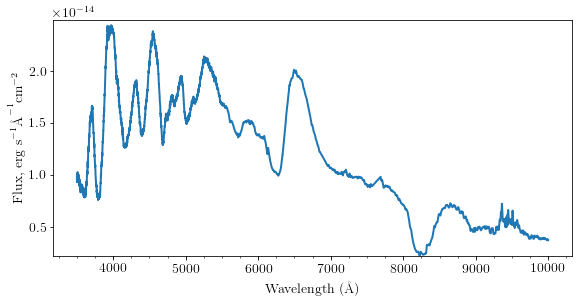

SN2011dh-2011-06-09-TNG-NICS-IJ-HK.dat
13
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-09-TNG-NICS-IJ-HK.dat
has data
redshift  0.001638
55721.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-09-TNG-NICS-IJ-HK.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


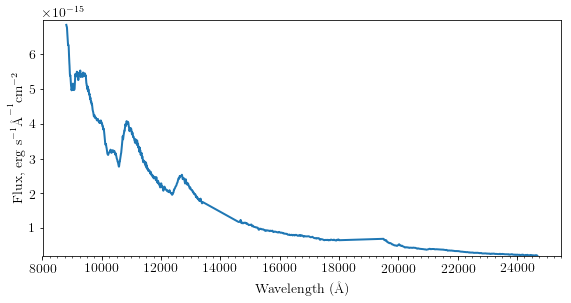

ptf11eon-20110609.383-ui.flm
14
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20110609.383-ui.flm
has data
redshift  0.001638
55721.4


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20110609.383-ui.flm. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


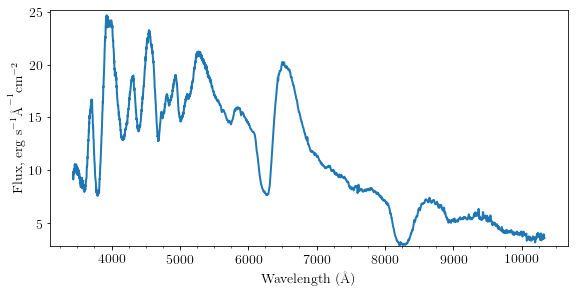

SN2011dh-2011-06-10-WHT-ISIS-R300B-R158R.dat
15
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-10-WHT-ISIS-R300B-R158R.dat
has data
redshift  0.001638
55722.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-10-WHT-ISIS-R300B-R158R.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


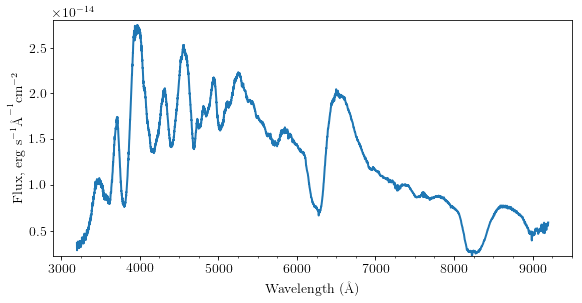

SN2011dh-2011-06-11-TNG-LRS-VHRV.dat
16
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-11-TNG-LRS-VHRV.dat
has data
redshift  0.001638
55723.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-11-TNG-LRS-VHRV.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


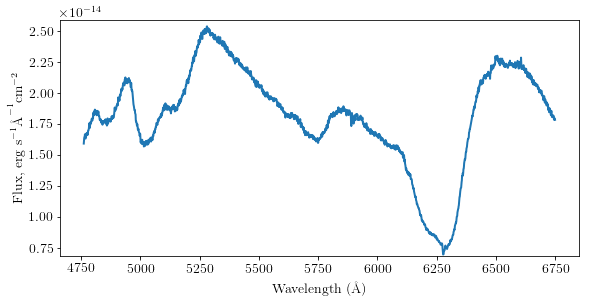

11eon_20110612_LT_blue.ascii
17
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110612_LT_blue.ascii
has data
redshift  0.001638
55724.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110612_LT_blue.ascii. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


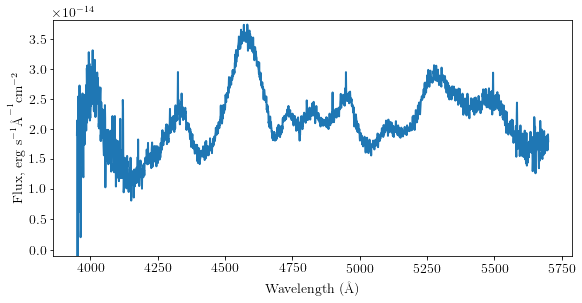

11eon_20110612_WHT_v1.ascii
18
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110612_WHT_v1.ascii
has data
redshift  0.001638
55724.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110612_WHT_v1.ascii. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


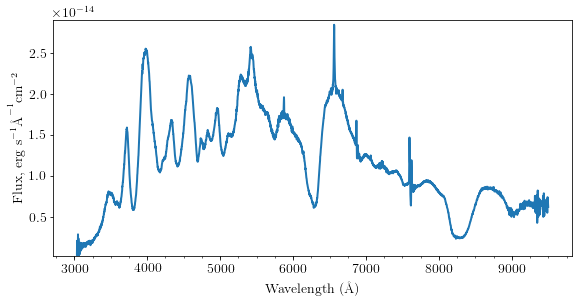

SN2011dh-2011-06-12-WHT-ISIS-R300B-R158R.dat
19
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-12-WHT-ISIS-R300B-R158R.dat
has data
redshift  0.001638
55724.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-12-WHT-ISIS-R300B-R158R.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


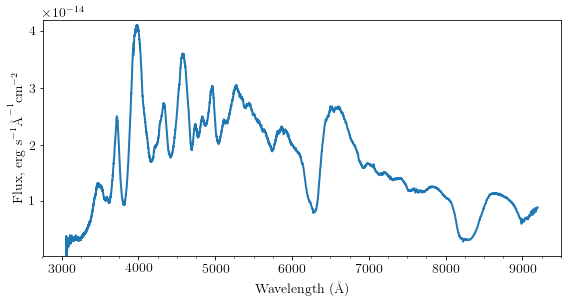

SN2011dh-2011-06-17-NOT-ALFOSC-Grism_4-Grism_5.dat
20
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-17-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55729.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-17-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


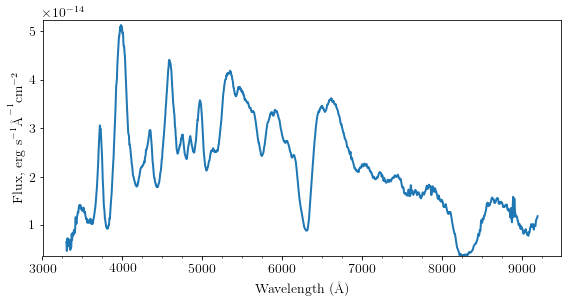

SN2011dh-2011-06-18-TNG-NICS-IJ-HK.dat
21
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-18-TNG-NICS-IJ-HK.dat
has data
redshift  0.001638
55730.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-18-TNG-NICS-IJ-HK.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


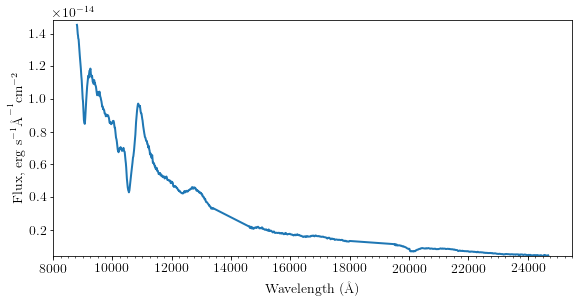

SN2011dh-2011-06-20-NOT-ALFOSC-Grism_4-Grism_5.dat
22
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-20-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55732.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-20-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


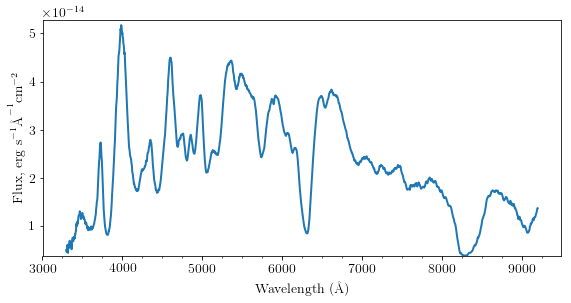

2004007096_oboo01010_sx1.fits
23
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007096_oboo01010_sx1.fits
has data
redshift  0.001638
55736.123360


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007096_oboo01010_sx1.fits. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


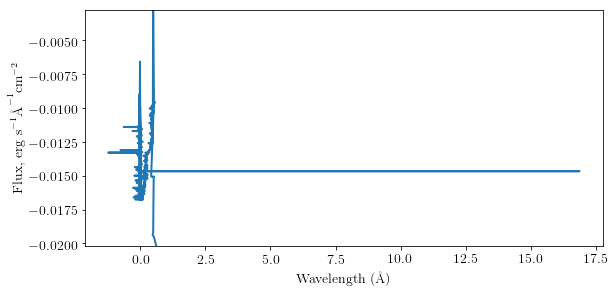

2004007097_oboo01020_sx1.fits
24
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007097_oboo01020_sx1.fits
has data
redshift  0.001638
55736.138565


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007097_oboo01020_sx1.fits. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


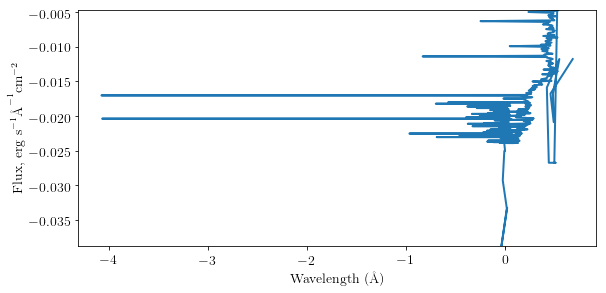

2004007098_oboo01030_sx1.fits
25
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007098_oboo01030_sx1.fits
has data
redshift  0.001638
55736.189910


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007098_oboo01030_sx1.fits. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


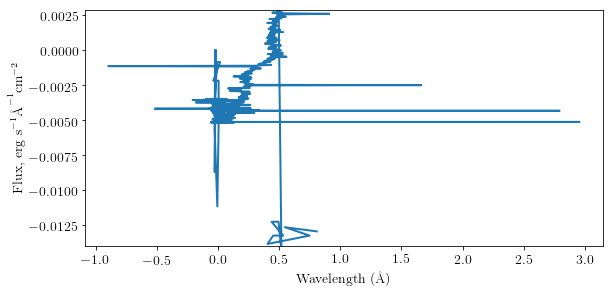

2004007099_oboo01040_sx1.fits
26
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007099_oboo01040_sx1.fits
has data
redshift  0.001638
55736.202560


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007099_oboo01040_sx1.fits. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


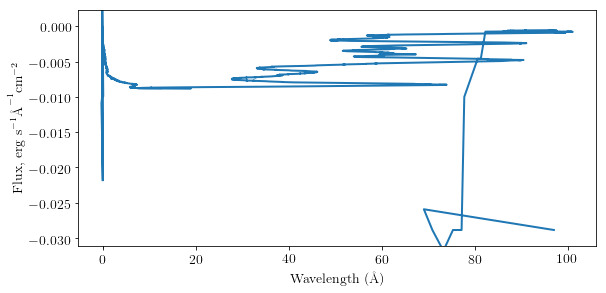

2004007100_oboo01050_sx1.fits
27
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007100_oboo01050_sx1.fits
has data
redshift  0.001638
55736.208510


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007100_oboo01050_sx1.fits. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


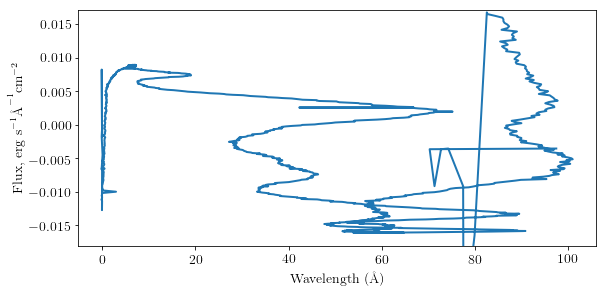

2004007101_oboo01060_sx1.fits
28
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007101_oboo01060_sx1.fits
has data
redshift  0.001638
55736.251550


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007101_oboo01060_sx1.fits. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


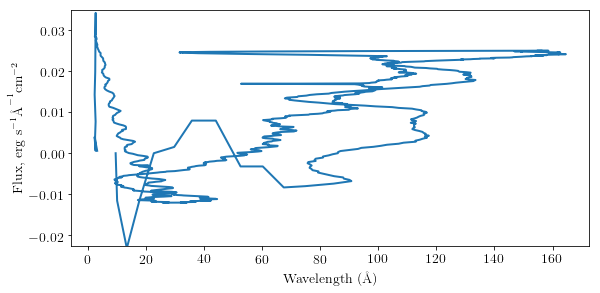

SN2011dh-2011-06-25-LBT-LUCIFER-200_H+K.dat
29
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-25-LBT-LUCIFER-200_H+K.dat
has data
redshift  0.001638
55737.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-25-LBT-LUCIFER-200_H+K.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


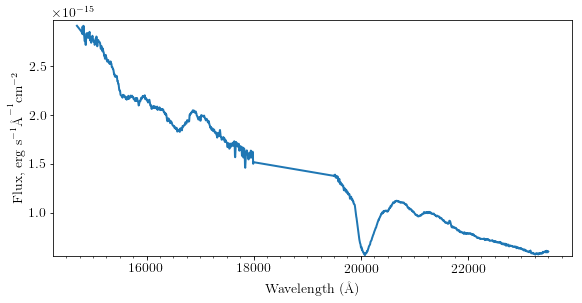

SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat
30
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55737.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


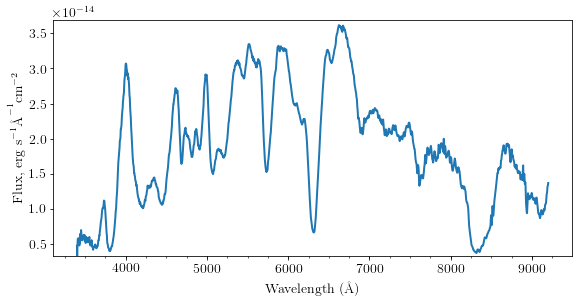

SN2011dh-2011-06-25-TNG-NICS-IJ.dat
31
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-25-TNG-NICS-IJ.dat
has data
redshift  0.001638
55737.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-25-TNG-NICS-IJ.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


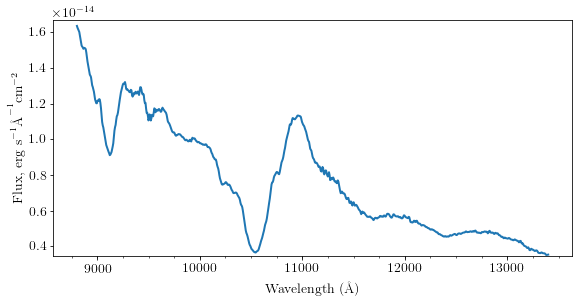

11eon_20110629_P200_v1.ascii
32
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110629_P200_v1.ascii
has data
redshift  0.001638
55741.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/11eon_20110629_P200_v1.ascii. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


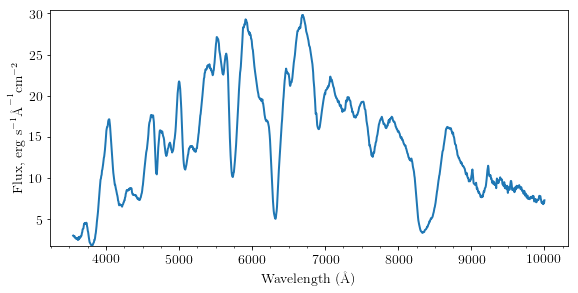

SN2011dh-2011-06-30-CA-CAFOS-B-100-R-100.dat
33
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-30-CA-CAFOS-B-100-R-100.dat
has data
redshift  0.001638
55742.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-30-CA-CAFOS-B-100-R-100.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


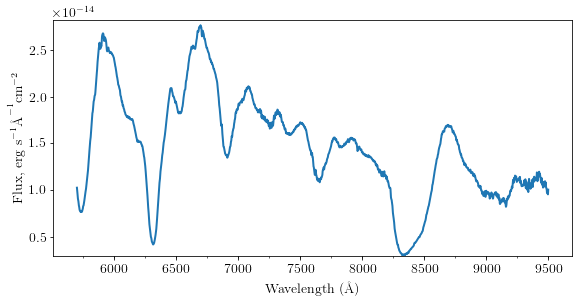

SN2011dh-2011-06-30-NOT-ALFOSC-Grism_4-Grism_5.dat
34
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-30-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55742.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-06-30-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


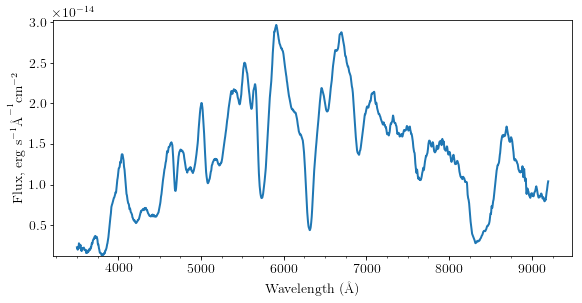

SN2011dh-2011-07-05-NOT-ALFOSC-Grism_4-Grism_5.dat
35
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-05-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55747.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-05-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


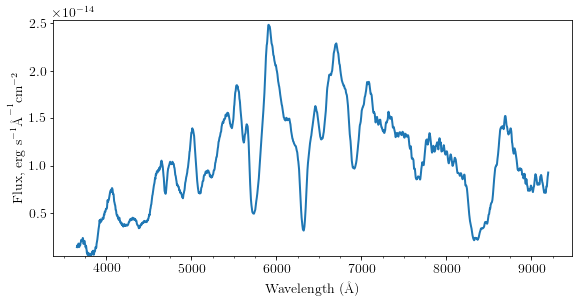

/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-05-TNG-NICS-IJ-HK.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


SN2011dh-2011-07-05-TNG-NICS-IJ-HK.dat
36
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-05-TNG-NICS-IJ-HK.dat
has data
redshift  0.001638
55747.0


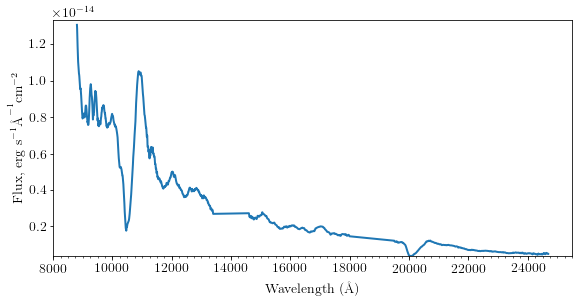

SN2011dh-2011-07-10-NOT-ALFOSC-Grism_4-Grism_5.dat
37
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-10-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55752.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-10-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


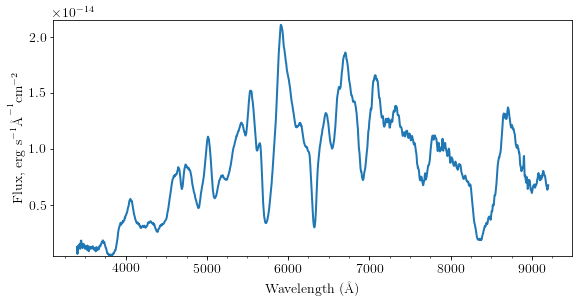

SN2011dh-2011-07-14-ASIAGO-DU440-gt300.dat
38
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-14-ASIAGO-DU440-gt300.dat
has data
redshift  0.001638
55756.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-14-ASIAGO-DU440-gt300.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


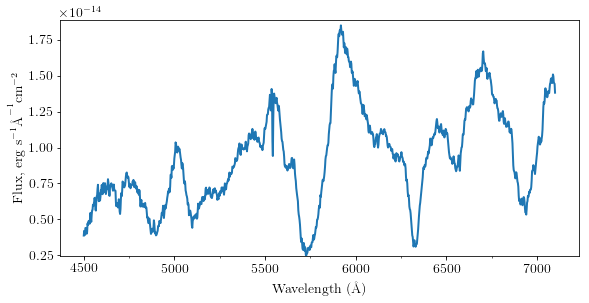

SN2011dh-2011-07-14-NOT-ALFOSC-Grism_4-Grism_5.dat
39
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-14-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55756.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-14-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


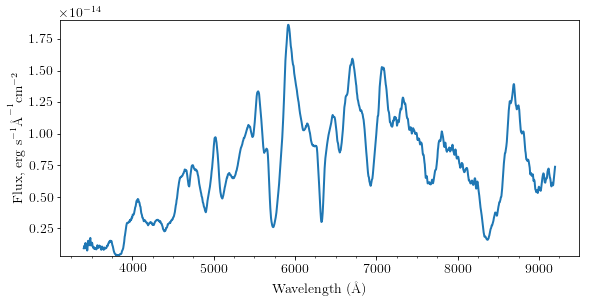

SN2011dh-2011-07-15-TNG-NICS-IJ-HK.dat
40
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-15-TNG-NICS-IJ-HK.dat
has data
redshift  0.001638
55757.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-15-TNG-NICS-IJ-HK.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


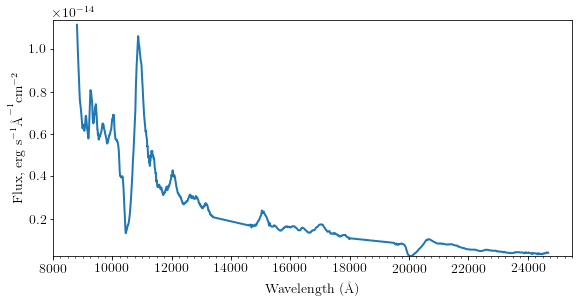

SN2011dh-2011-07-18-CA-CAFOS-B-200.dat
41
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-18-CA-CAFOS-B-200.dat
has data
redshift  0.001638
55760.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-18-CA-CAFOS-B-200.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


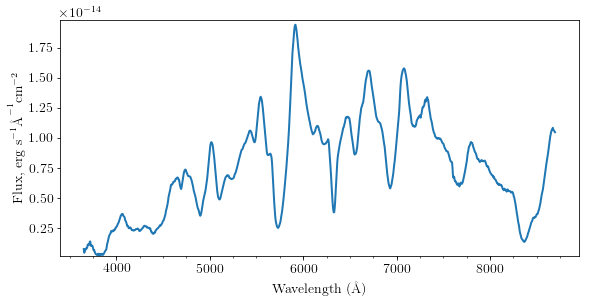

SN2011dh-2011-07-19-NOT-ALFOSC-Grism_4-Grism_5.dat
42
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-19-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55761.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-19-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


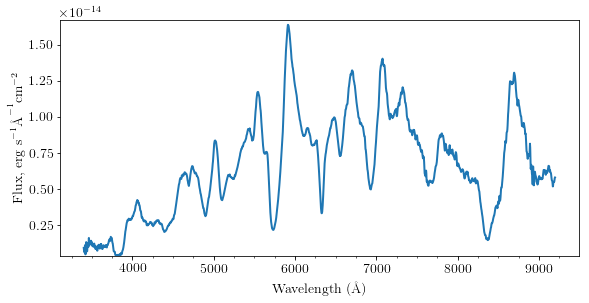

/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-22-NOT-ALFOSC-Grism_4-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


SN2011dh-2011-07-22-NOT-ALFOSC-Grism_4-Grism_5.dat
43
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-22-NOT-ALFOSC-Grism_4-Grism_5.dat
has data
redshift  0.001638
55764.0


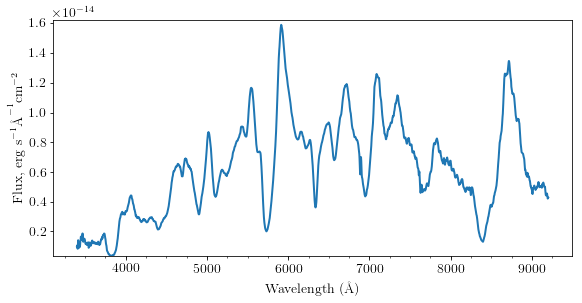

SN2011dh-2011-07-22-TNG-NICS-IJ-HK.dat
44
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-22-TNG-NICS-IJ-HK.dat
has data
redshift  0.001638
55764.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-22-TNG-NICS-IJ-HK.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


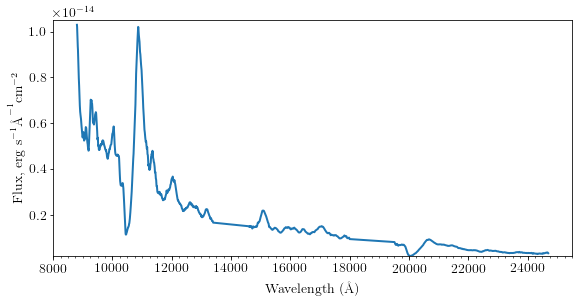

SN2011dh-2011-07-28-CA-CAFOS-B-100-R-100.dat
45
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-28-CA-CAFOS-B-100-R-100.dat
has data
redshift  0.001638
55770.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-07-28-CA-CAFOS-B-100-R-100.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


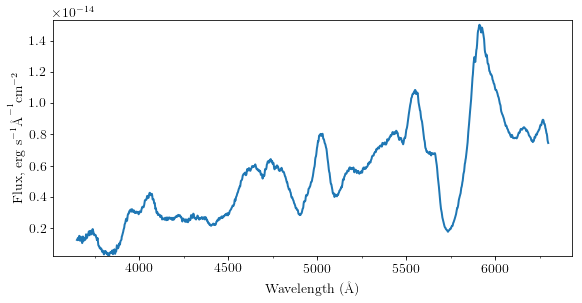

SN2011dh-2011-08-06-NOT-ALFOSC-Grism_4.dat
46
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-06-NOT-ALFOSC-Grism_4.dat
has data
redshift  0.001638
55779.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-06-NOT-ALFOSC-Grism_4.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


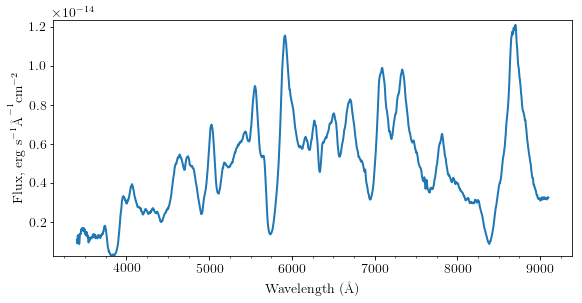

SN2011dh-2011-08-06-WHT-LIRIS-zJ-HK.dat
47
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-06-WHT-LIRIS-zJ-HK.dat
has data
redshift  0.001638
55779.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-06-WHT-LIRIS-zJ-HK.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


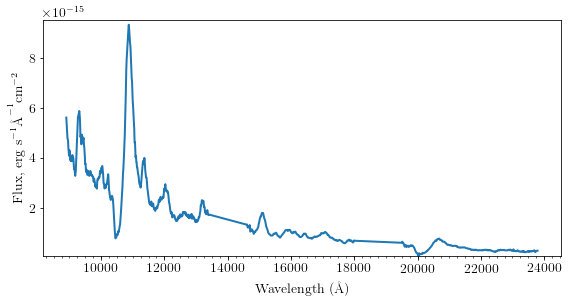

SN2011dh-2011-08-10-CA-CAFOS-B-100-R-100.dat
48
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-10-CA-CAFOS-B-100-R-100.dat
has data
redshift  0.001638
55783.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-10-CA-CAFOS-B-100-R-100.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


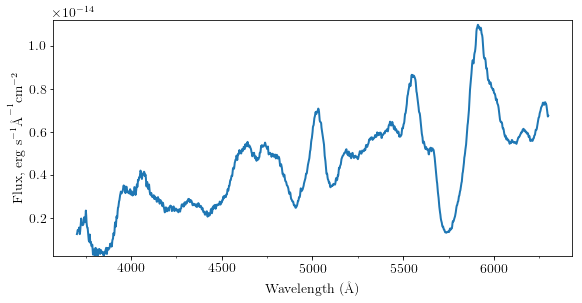

SN2011dh-2011-08-21-CA-CAFOS-B-200-R-200.dat
49
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-21-CA-CAFOS-B-200-R-200.dat
has data
redshift  0.001638
55794.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-21-CA-CAFOS-B-200-R-200.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


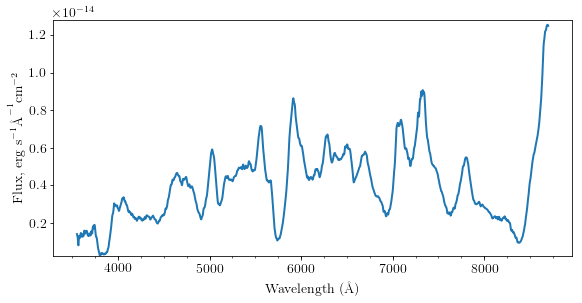

SN2011dh-2011-08-27-TNG-NICS-IJ-HK.dat
50
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-27-TNG-NICS-IJ-HK.dat
has data
redshift  0.001638
55800.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-27-TNG-NICS-IJ-HK.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


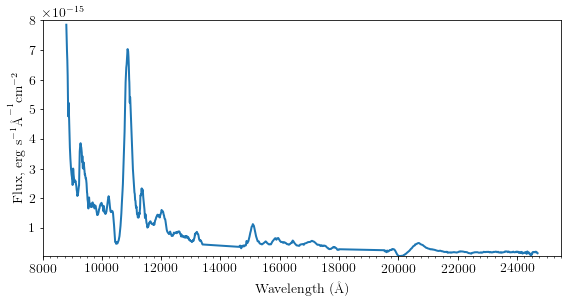

SN2011dh-2011-08-28-ASIAGO-DU440-gt300.dat
51
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-28-ASIAGO-DU440-gt300.dat
has data
redshift  0.001638
55801.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-28-ASIAGO-DU440-gt300.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


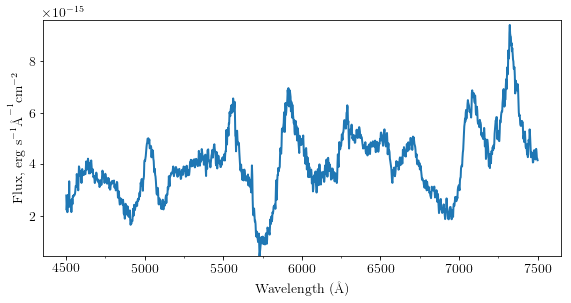

SN2011dh-2011-08-30-WHT-ISIS-R300B-R158R.dat
52
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-30-WHT-ISIS-R300B-R158R.dat
has data
redshift  0.001638
55803.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-08-30-WHT-ISIS-R300B-R158R.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


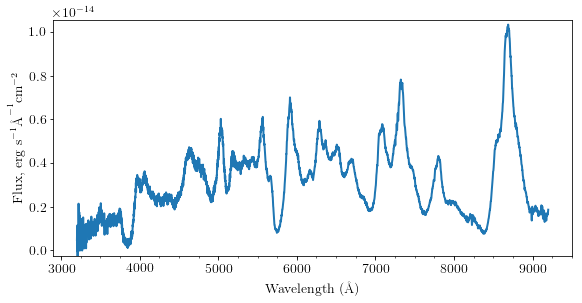

SN2011dh-2011-09-07-CA-CAFOS-B-200-R-200.dat
53
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-09-07-CA-CAFOS-B-200-R-200.dat
has data
redshift  0.001638
55811.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-09-07-CA-CAFOS-B-200-R-200.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


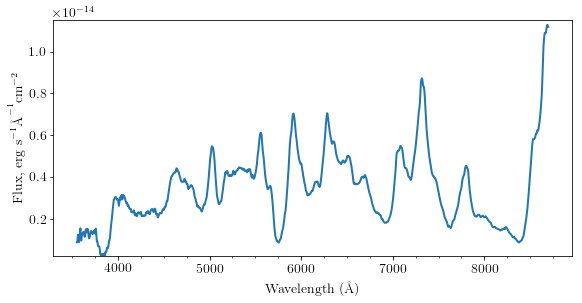

SN2011dh-2011-09-16-CA-CAFOS-B-200-R-200.dat
54
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-09-16-CA-CAFOS-B-200-R-200.dat
has data
redshift  0.001638
55820.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-09-16-CA-CAFOS-B-200-R-200.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


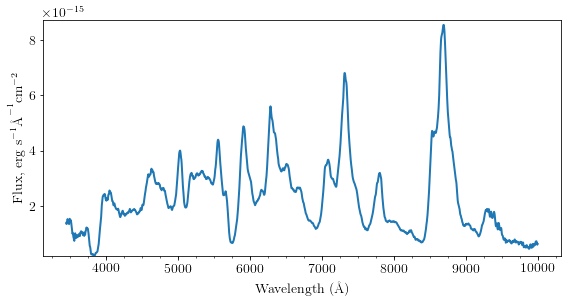

SN2011dh-2011-09-23-WHT-ISIS-R300B-R158R.dat
55
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-09-23-WHT-ISIS-R300B-R158R.dat
has data
redshift  0.001638
55827.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-09-23-WHT-ISIS-R300B-R158R.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


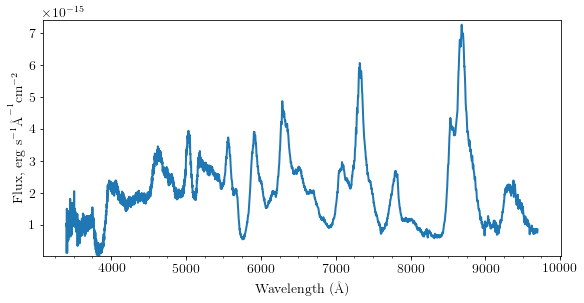

SN2011dh-2011-10-30-ASIAGO-AFOSC-GR04.dat
56
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-10-30-ASIAGO-AFOSC-GR04.dat
has data
redshift  0.001638
55864.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-10-30-ASIAGO-AFOSC-GR04.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


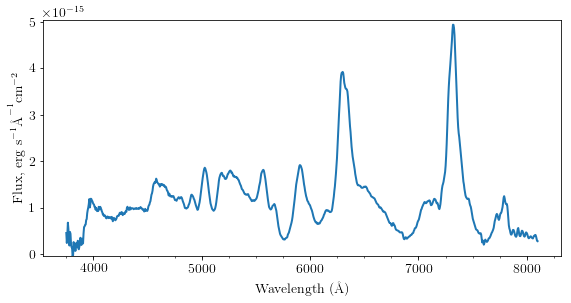

SN2011dh-2011-11-02-CA-CAFOS-G-200.dat
57
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-11-02-CA-CAFOS-G-200.dat
has data
redshift  0.001638
55867.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-11-02-CA-CAFOS-G-200.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


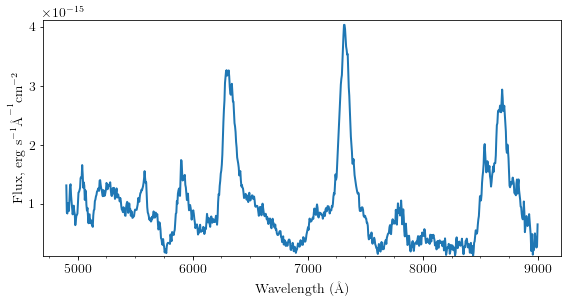

SN2011dh-2011-11-28-NOT-ALFOSC-Grism_3.dat
58
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-11-28-NOT-ALFOSC-Grism_3.dat
has data
redshift  0.001638
55893.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-11-28-NOT-ALFOSC-Grism_3.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


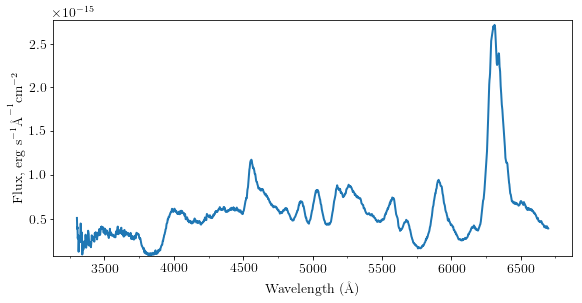

/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-12-03-NOT-ALFOSC-Grism_5.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


SN2011dh-2011-12-03-NOT-ALFOSC-Grism_5.dat
59
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-12-03-NOT-ALFOSC-Grism_5.dat
has data
redshift  0.001638
55898.0


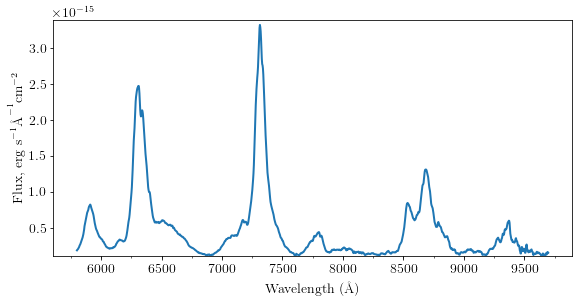

SN2011dh-2011-12-16-WHT-LIRIS-zJ.dat
60
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-12-16-WHT-LIRIS-zJ.dat
has data
redshift  0.001638
55911.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-12-16-WHT-LIRIS-zJ.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


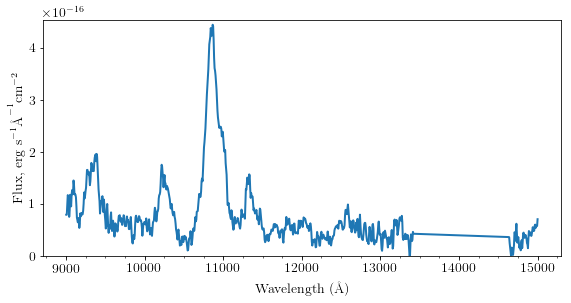

ptf11eon-20111218.558-ui.flm
61
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20111218.558-ui.flm
has data
redshift  0.001638
55913.6


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20111218.558-ui.flm. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


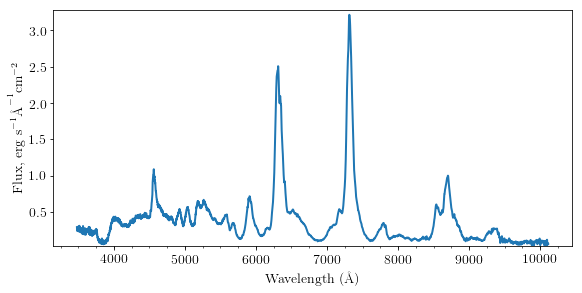

SN2011dh-2011-12-19-WHT-ISIS-R300B-R158R.dat
62
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-12-19-WHT-ISIS-R300B-R158R.dat
has data
redshift  0.001638
55914.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-12-19-WHT-ISIS-R300B-R158R.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


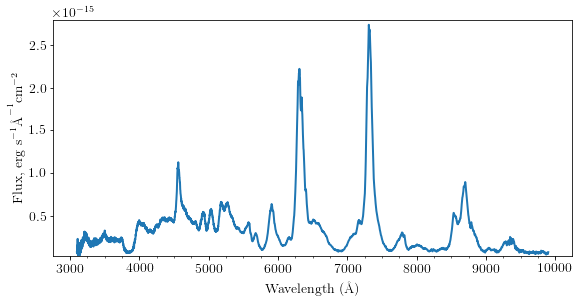

SN2011dh-2011-12-23-TNG-NICS-HK.dat
63
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-12-23-TNG-NICS-HK.dat
has data
redshift  0.001638
55918.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2011-12-23-TNG-NICS-HK.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


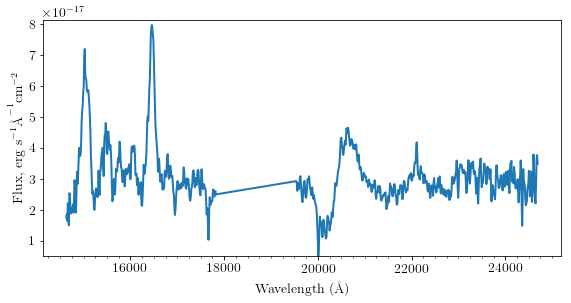

ptf11eon_20111223_031_fosc.ascii
64
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon_20111223_031_fosc.ascii
has data
redshift  0.001638
55918.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon_20111223_031_fosc.ascii. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


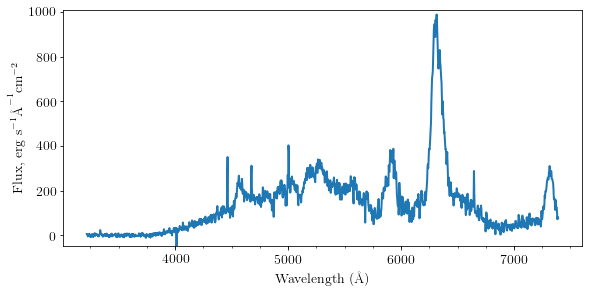

ptf11eon-20111224.586-ui.flm
65
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20111224.586-ui.flm
has data


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20111224.586-ui.flm. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


redshift  0.001638
55919.6


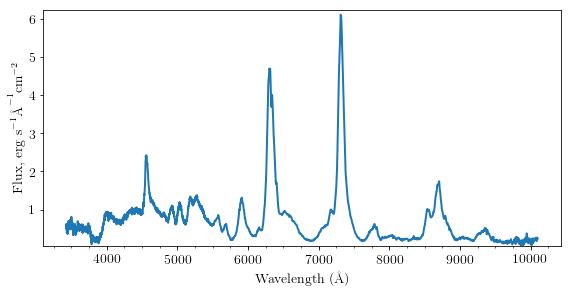

SN2011dh-2012-01-25-NOT-ALFOSC-Grism_4.dat
66
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-01-25-NOT-ALFOSC-Grism_4.dat
has data
redshift  0.001638
55951.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-01-25-NOT-ALFOSC-Grism_4.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


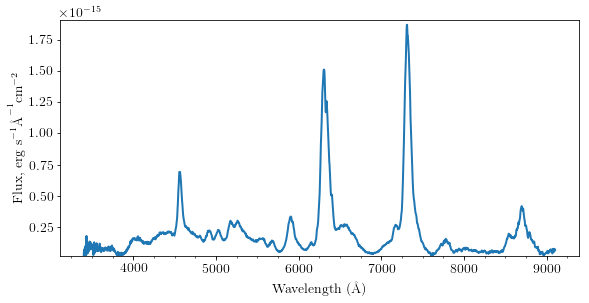

ptf11eon-20120223.458-ui.flm
67
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20120223.458-ui.flm
has data
redshift  0.001638
55980.5


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20120223.458-ui.flm. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


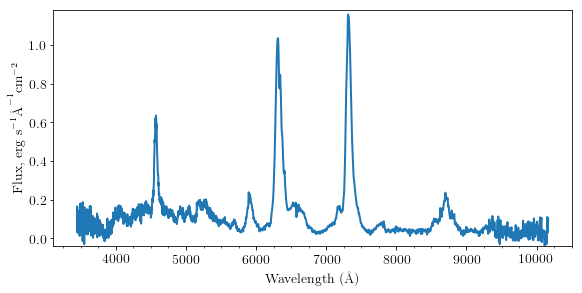

SN2011dh-2012-03-12-CA-CAFOS-R-200.dat
68
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-03-12-CA-CAFOS-R-200.dat
has data
redshift  0.001638
55998.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-03-12-CA-CAFOS-R-200.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


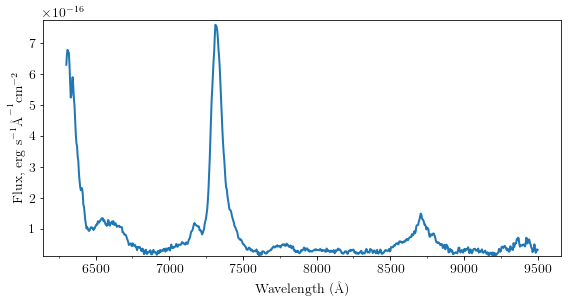

SN2011dh-2012-03-18-NOT-ALFOSC-Grism_4.dat
69
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-03-18-NOT-ALFOSC-Grism_4.dat
has data
redshift  0.001638
56004.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-03-18-NOT-ALFOSC-Grism_4.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


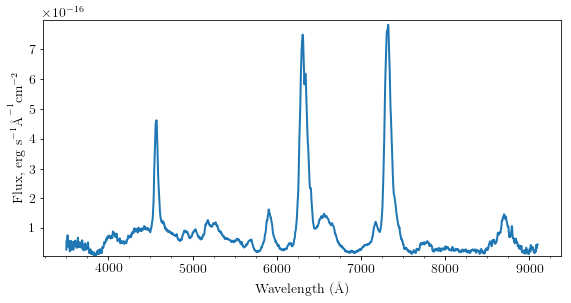

SN2011dh-2012-03-27-WHT-ISIS-R600B-R316R.dat
70
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-03-27-WHT-ISIS-R600B-R316R.dat
has data
redshift  0.001638
56013.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-03-27-WHT-ISIS-R600B-R316R.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


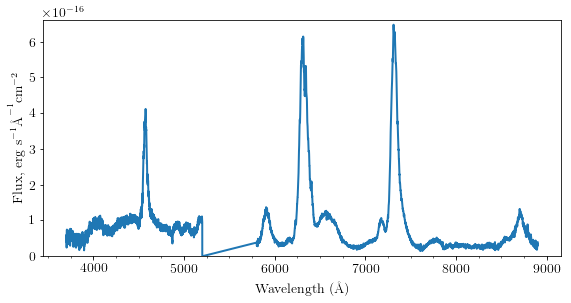

2004007105_oboo02030_x1d.fits
71
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007105_oboo02030_x1d.fits
has data
redshift  0.001638
56015.865660


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007105_oboo02030_x1d.fits. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


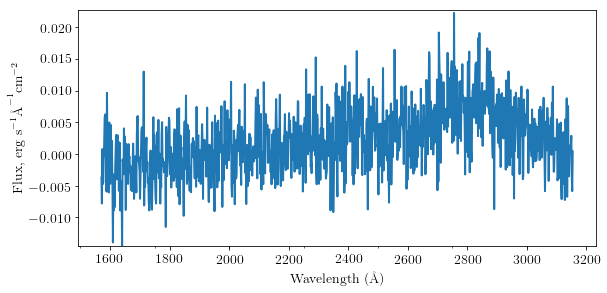

2004007106_oboo02040_x1d.fits
72
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007106_oboo02040_x1d.fits
has data
redshift  0.001638
56015.920690


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/2004007106_oboo02040_x1d.fits. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


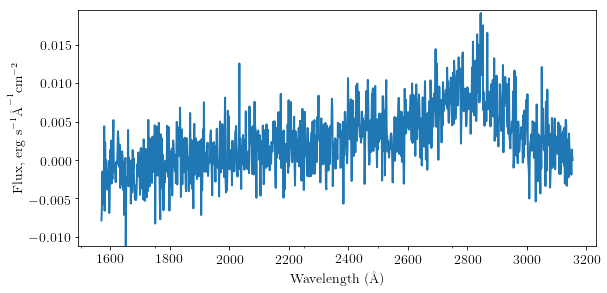

ptf11eon-20120429.253-b.flm
73
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20120429.253-b.flm
has data
redshift  0.001638
56046.3


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20120429.253-b.flm. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


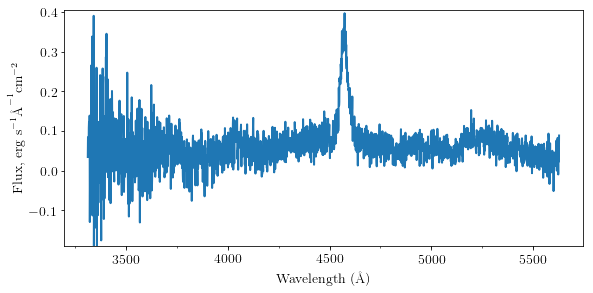

ptf11eon-20120429.253-hi.flm
74
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20120429.253-hi.flm
has data
redshift  0.001638


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/ptf11eon-20120429.253-hi.flm. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


56046.3


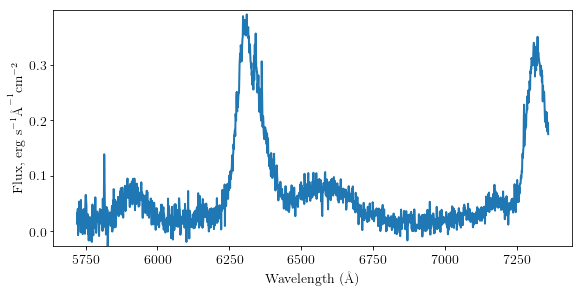

SN2011dh-2012-05-24-GTC-OSIRIS-R500B-R500R.dat
75
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-05-24-GTC-OSIRIS-R500B-R500R.dat
has data
redshift  0.001638
56071.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-05-24-GTC-OSIRIS-R500B-R500R.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


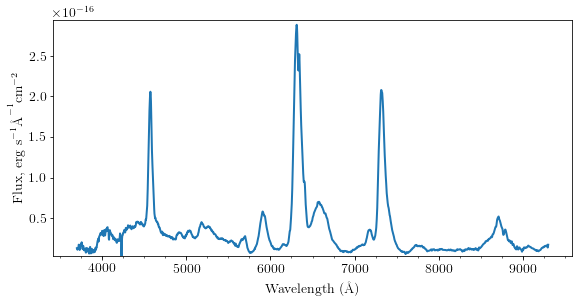

SN2011dh-2012-07-19-GTC-OSIRIS-R300B.dat
76
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-07-19-GTC-OSIRIS-R300B.dat
has data
redshift  0.001638
56127.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/SN2011dh-2012-07-19-GTC-OSIRIS-R300B.dat. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


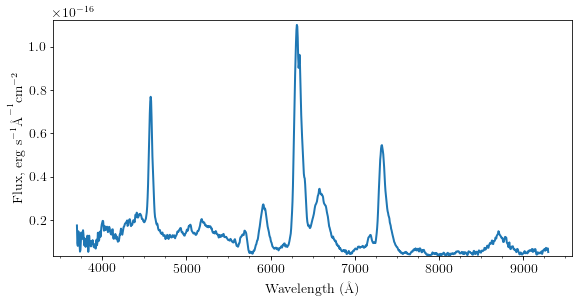

PTF11eon-20130217.429-b.flm
77
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/PTF11eon-20130217.429-b.flm
has data
redshift  0.001638
56340.4


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/PTF11eon-20130217.429-b.flm. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


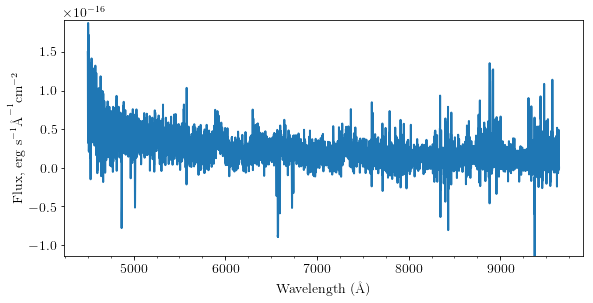

PTF11eon-20130408.445-b.flm
78
/Users/berto/data/CoreCollapse/data/spectra/SN2011dh/PTF11eon-20130408.445-b.flm
has data
redshift  0.001638
56390.4


/Users/berto/Code/verbose-enigma/pycoco/classes.py:489: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2011dh/PTF11eon-20130408.445-b.flm. Run with squash = True to overwrite
  warnings.warn("Found existing file matching " + os.path.join(path, filename) + ". Run with squash = True to overwrite")


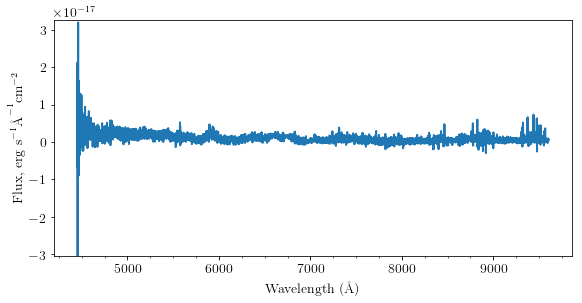

In [21]:
for spec_file in np.array(spec_filenames):
# for spec_file in np.array(spec_filenames)[mask]:
    print(spec_file)
    
    w = np.where(np.array(spec_filenames) == spec_file)[0][0]
    print(w)
    
    wavl = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[0]
    flux = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[1]

    wavelength = Column(wavl, name = ("wavelength"), unit=u.Angstrom)
#     wavelength = Column(wavl*(1+np.float64(sndict["redshift"][0]["value"])), name = ("wavelength"), unit=u.Angstrom)
    flux = Column(flux, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)

    spec_table = Table([wavelength, flux])

    s = pcc.SpectrumClass()

    s.load_table(spec_table, path="")
    print(os.path.join(spec_dir, spec_file))
    s.save(spec_file, path=spec_dir, )
    out_dict = OrderedDict()
    out_dict["filename"] = os.path.join(spec_dir, spec_file)
    out_dict["time"] = np.float64(spec_dict_list[w]["time"])
    out_dict["redshift"] = np.float64(sndict["redshift"][0]["value"])
    print("redshift ", out_dict["redshift"])
    out_dict["snname"] = snname
    print(spec_dict_list[w]["time"])
    uncombined = np.append(uncombined, out_dict)
    
    s.plot()

In [ ]:
# out_array = np.append(combined, uncombined)

In [ ]:
out_array = uncombined

In [ ]:
out_array

In [ ]:
# [i["filename"] for i in out_array]
# [i["redshift"] for i in out_array]
# [i["snname"] for i in out_array]
# [i["time"] for i in out_array]

We need a (rough) estimate of the time of maximum light (only to ensure the spectra adhere to our naming convention), so from Folatelli et al. 2014 (http://iopscience.iop.org/article/10.1088/0004-637X/792/1/7/pdf) we have:

In [ ]:
# mjdmax = 55286.4

In [ ]:
# keys = out_array[0].keys()

keys = ["filename",
        "snname",
        "time",
        "redshift"]
columns = []
for key in keys:
    columns.append([i[key] for i in out_array])

In [ ]:
keys[2] = "MJD"
list_table = Table(columns, names = keys)

In [ ]:
list_table.add_index("MJD")
list_table.sort()

In [ ]:
list_table

In [ ]:
list_out_path = os.path.join(pcc.defaults._default_list_dir_path, snname+".list")
list_table.write(list_out_path, format="ascii.no_header")

In [ ]:
info = pcc.classes.InfoClass()
info.load()

In [ ]:
info._data

In [ ]:
small_table = info._data[("snname", "z_obs", "mu", "RA", "Dec", "Type", "z_distmod")]

In [ ]:
small_table

In [ ]:
sndict.keys()

In [ ]:
sndict["lumdist"]

In [ ]:
from astropy.cosmology import LambdaCDM
from astropy.coordinates import Distance

mu = 32.16 ## from NED -- https://ned.ipac.caltech.edu/ui/?q=objsearch&omegav=0.73&obj_sort=RA%20or%20Longitude&omegam=0.27&extend=no&hconst=73&out_csys=Equatorial&of=pre_text&img_stamp=YES&list_limit=5&out_equinox=J2000.0&corr_z=1&objname=NGC%206000

d = Distance(distmod=mu)

z_distmod = d.z

In [ ]:
(snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod)

In [ ]:
small_table.add_row((snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod))

In [ ]:
small_table

In [ ]:
outfile = pcc.defaults._default_info_path.replace(".dat", "_new.dat")
small_table.write(outfile, format="ascii.commented_header")


# Photometry
---


In [ ]:
sndict["photometry"]

In [ ]:
phot_dict_list = sndict["photometry"]
new_phot_dict_list = []
for i in phot_dict_list:
    out_dict = OrderedDict()
    
    out_dict["MJD"] = i["time"]
    out_dict["mag"] = i["magnitude"]
    out_dict["dmag"] = i["e_magnitude"]
    out_dict["filter"] = i["band"]
    
    new_phot_dict_list.append(out_dict)

In [ ]:
phot_table=Table(rows=new_phot_dict_list)

In [ ]:
phot_table

In [ ]:
w = np.where(phot_table["filter"] != "clear")
# print(w)

In [ ]:
phot_table_filtered = phot_table[w]

In [ ]:
# pcc.kcorr.calc_AB_zp?
filt_dict = OrderedDict()

for filter_name in np.unique(phot_table_filtered["filter"]):
#     filter_name = "Bessell"+filter_name
#     filter_dir_path = os.path.join(pcc.defaults._default_filter_dir_path, "Bessell"+filter_name+".dat")
    print(filter_name)
    filter_object = pcc.classes.FilterClass()
    filter_object.load(path=os.path.join(pcc.defaults._default_filter_dir_path, "Bessell"+filter_name+".dat"), fmt="ascii",
                      name="Bessell"+filter_name)
    filter_object.calculate_AB_zp()
    filt_dict["Bessell"+filter_name]=filter_object

In [ ]:
phot_table_filtered["filter"] = Column(list(map(lambda x: "Bessell"+x, phot_table_filtered["filter"])))

In [ ]:
phot_table_filtered

In [ ]:
# filt_dict["BessellB"].zp_AB
phot_table_filtered["zp_AB"] = Column(list(map(lambda x: filt_dict[x].zp_AB, phot_table_filtered["filter"])), name="zp_AB")

In [ ]:
phot_table_filtered["zp_AB"] phot_table_filtered["mag"]

In [ ]:
SN = pcc.classes.SNClass(snname)
SN.load_phot()
SN.plot_lc()

In [ ]:
list_file_path = "/Users/berto/Code/CoCo/lists/"+snname+".list"
# list_file_path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.list"
SN.load_list(path=list_file_path)

In [ ]:
SN.load_spec()

In [ ]:
SN.plot_spec()

In [ ]:
SN.spec

In [ ]:
fit_path = "/Users/berto/Code/CoCo/recon/"+snname+".dat"
SN.get_lcfit(fit_path)

SN.plot_lc()

In [ ]:
# pcc.functions.run_specfit(list_file_path)